In [ ]:
from google.colab import drive
drive.mount('/content/gDrive')

Mounted at /content/gDrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv(r'/content/gDrive/MyDrive/ML/dd.csv',sep=';')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CALLID  8378 non-null   object
 1   txt     8378 non-null   object
 2   class   8378 non-null   object
dtypes: object(3)
memory usage: 196.5+ KB


In [ ]:
data['class'].unique()

array(['c1', 'c2', 'c3', 'c4', 'c5'], dtype=object)

In [ ]:
from sklearn import preprocessing
lenc = preprocessing.LabelEncoder()


def labelEncode(data, columns):
    for col in columns:
        encoded = lenc.fit_transform(data[col])
        data = pd.concat([data.drop(col, axis=1), pd.DataFrame(encoded)], axis=1)
    return data

In [ ]:
data = labelEncode(data,  ['class'])
Y = data.iloc[:, 2]

Class 0: 1672
Class 1: 1694
Class 2: 1676
Class 3: 1669
Class 4: 1667




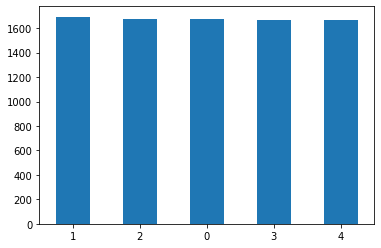

In [ ]:
# data distribution

target_count = Y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Class 3:', target_count[3])
print('Class 4:', target_count[4])
target_count.plot(kind='bar', rot = 0);
print("\n")


In [ ]:
data =pd.DataFrame( data.iloc[:, 1])

In [ ]:
data.shape

(8378, 1)

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data["txt"] = data["txt"].str.lower()

In [ ]:
removed_numbers = data.txt.str.replace(r'\d+','')
removed_numbers.txt = data.txt.str.replace(r'\d+','')

In [ ]:
no_special_characters = removed_numbers.txt.str.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
no_special_characters.txt = removed_numbers.txt.str.replace(r'[^A-Za-z0-9 ]+', '', regex=True)

In [ ]:
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words= 200, filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True, split=" ")
tk.fit_on_texts(no_special_characters.txt)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X = count_vect.fit_transform(no_special_characters.txt)
X.shape

(8378, 15657)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X)
X_train_tfidf.shape

(8378, 15657)

In [ ]:
X = X_train_tfidf

In [ ]:
# importing and defining models

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC


dt = tree.DecisionTreeClassifier(max_depth=15);
knn = KNeighborsClassifier(n_neighbors=1)
rf = RandomForestClassifier(n_estimators=100, max_depth=19)
nb = GaussianNB()
svm = LinearSVC()
mlp = MLPClassifier(max_iter = 500)
bagging = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=13))

In [ ]:
# apply models to dataset

from sklearn.model_selection import  cross_val_predict
import time

times = []

start = time.time()
dt_pred = cross_val_predict(dt, X, Y, cv=5)
times.append(time.time() - start)

start = time.time()
knn_pred = cross_val_predict(knn, X, Y, cv=5)
times.append(time.time() - start)

start = time.time()
mlp_pred = cross_val_predict(mlp, X, Y, cv=5)
times.append(time.time() - start)

start = time.time()
rf_pred = cross_val_predict(rf, X, Y, cv=5)
times.append(time.time() - start)

start = time.time()
nb_pred = cross_val_predict(nb, X.toarray(), Y, cv=5)
times.append(time.time() - start)

start = time.time()
svm_pred = cross_val_predict(svm, X.toarray(), Y, cv=5)
times.append(time.time() - start)

start = time.time()
bagging_pred = cross_val_predict(bagging, X, Y, cv=5)
times.append(time.time() - start)


In [ ]:
#Evaluate

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

lst = [
    [
        accuracy_score(dt_pred, Y),
        accuracy_score(knn_pred, Y),
        accuracy_score(mlp_pred, Y),
        accuracy_score(nb_pred, Y),
        accuracy_score(rf_pred, Y),
        accuracy_score(bagging_pred, Y),
        accuracy_score(svm_pred, Y)
    ],
    [
        precision_score(dt_pred, Y,average='macro'),
        precision_score(knn_pred, Y,average='macro'),
        precision_score(mlp_pred, Y,average='macro'),
        precision_score(nb_pred, Y,average='macro'),
        precision_score(rf_pred, Y,average='macro'),
        precision_score(bagging_pred, Y,average='macro'),
        precision_score(svm_pred, Y,average='macro')
    ],
    [
        recall_score(dt_pred, Y,average='macro'),
        recall_score(knn_pred, Y,average='macro'),
        recall_score(mlp_pred, Y,average='macro'),
        recall_score(nb_pred, Y,average='macro'),
        recall_score(rf_pred, Y,average='macro'),
        recall_score(bagging_pred, Y,average='macro'),
        recall_score(svm_pred, Y,average='macro')
     
    ], 
   
    [
        f1_score(dt_pred, Y,average='macro'),
        f1_score(knn_pred, Y,average='macro'),
        f1_score(mlp_pred, Y,average='macro'),
        f1_score(nb_pred, Y,average='macro'),
        f1_score(rf_pred, Y,average='macro'),
        f1_score(bagging_pred, Y,average='macro'),
        f1_score(svm_pred, Y,average='macro')
    ],
    [x/60 for x in times]
]

eval_df = pd.DataFrame(lst, columns=['Decision Tree', 'K Nearest Neighbour', 'Multi layer perceptron','Naive Bayes', 'Random Forest','Bagging','SVM'], index=['Accuracy', 'Precision','Recall', 'F1-score', 'Running time(mins)'])

eval_df

,Decision Tree,K Nearest Neighbour,Multi layer perceptron,Naive Bayes,Random Forest,Bagging,SVM
Accuracy,0.433994,0.376940,0.518740,0.380878,0.554548,0.464073,0.578420
Precision,0.434362,0.376993,0.518774,0.380970,0.554705,0.464576,0.578499
Recall,0.470840,0.377296,0.518148,0.391750,0.555635,0.513630,0.578300
F1-score,0.428769,0.376336,0.518188,0.372676,0.553016,0.459607,0.578057
Running time(mins),0.039069,0.031816,13.598376,0.174909,0.191054,0.078957,0.240509


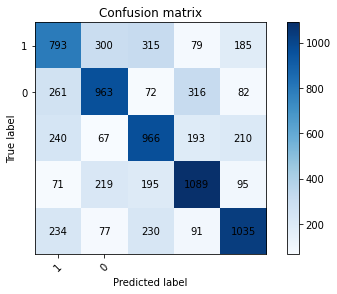

In [ ]:
# confusion Matrix for SVM
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(Y,svm_pred)
plot_confusion_matrix(cm, ['1', '0'])